In [ ]:
#Parameter limits - extending slightly beyond the first and third quartile from the paper A Gupta et al. 2022 table 1
#https://doi.org/10.1073/pnas.2207392119

In [1]:
import numpy as np
params_median = {'k_on_TF': 0.27,
          'k_off_TF': 8.4,
          'burst_size_TF': 32,
          'k_on_Target': 0.25,
          'k_off_Target': 7.7,
          'burst_size_Target': 40,
          'splicing_half_life_minutes': 7, #7,
          'mrna_half_life_TF': 2.5,
          'mrna_half_life_Target': 3.7,
          'protein_half_life': 28,
          'protein_production_rate': 0.059, 
          'labeling_efficiency': 1,
          'pulse_time': 60,
          'num_cells': 20_000,
          'dynamics': 'MM',
          'capture_efficiency': 1}

ranges_for_kOn = np.linspace(0.125, 0.5, 10)
ranges_for_kOff = np.linspace(1.33, 80, 10)
ranges_for_mRNA_halflife = np.linspace(1, 6, 10)
ranges_for_protein_halflife = np.linspace(10, 90, 10)
ranges_for_burst_size = np.linspace(15, 80, 10)
ranges_for_translation_rate = np.linspace(0.020, 0.320, 10)

#generate a list of dictionaries such that I change one parameter at a time and keep the rest as median

def generate_parameter_sets(params_median):
    list_param_dict = []
    for key in params_median.keys():
        if key == 'k_on_TF' or key == 'k_on_Target':
            for k in ranges_for_kOn:
                param_dict = params_median.copy()
                param_dict[key] = k
                list_param_dict.append(param_dict)
        elif key == 'k_off_TF' or key == 'k_off_Target':
            for k in ranges_for_kOff:
                param_dict = params_median.copy()
                param_dict[key] = k
                list_param_dict.append(param_dict)
        elif key == 'burst_size_TF' or key == 'burst_size_Target':
            for k in ranges_for_burst_size:
                param_dict = params_median.copy()
                param_dict[key] = k
                list_param_dict.append(param_dict)
        elif key == 'mrna_half_life_TF' or key == 'mrna_half_life_Target':
            for k in ranges_for_mRNA_halflife:
                param_dict = params_median.copy()
                param_dict[key] = k
                list_param_dict.append(param_dict)
        elif key == 'protein_half_life':
            for k in ranges_for_protein_halflife:
                param_dict = params_median.copy()
                param_dict[key] = k
                list_param_dict.append(param_dict)
        elif key == 'protein_production_rate' :
            for k in ranges_for_translation_rate:
                param_dict = params_median.copy()
                param_dict[key] = k
                list_param_dict.append(param_dict)
    return list_param_dict

list_params = generate_parameter_sets(params_median)


In [2]:
#save the list of dictionaries to a csv
import pandas as pd
df = pd.DataFrame(list_params)
df.to_csv('/home/mzo5929/Keerthana/grnInference/simulationData/parameter_sweep.csv', index=True)


In [1]:
import numpy as np
import pandas as pd
from scipy.stats import qmc

In [8]:
ranges_for_kOn = np.linspace(0.125, 0.5, 10)
ranges_for_kOff = np.linspace(1.33, 80, 10)
ranges_for_mRNA_halflife = np.linspace(1, 6, 10)
ranges_for_protein_halflife = np.linspace(10, 90, 10)
ranges_for_burst_size = np.linspace(15, 80, 10)
ranges_for_translation_rate = np.linspace(0.020, 0.320, 10)
ranges_for_n = np.linspace(0.5, 5, 10)


params_variable = {'k_on_TF': 0.27,
          'k_off_TF': 8.4,
          'burst_size_TF': 32,
          'k_on_Target': 0.25,
          'k_off_Target': 7.7,
          'burst_size_Target': 40,
          'mrna_half_life_TF': 2.5,
          'mrna_half_life_Target': 3.7,
          'protein_half_life': 28,
          'protein_production_rate': 0.059,
          'n': 2}

params_constant ={'splicing_half_life_minutes': 7, 
          'labeling_efficiency': 1,
          'pulse_time': 60,
          'num_cells': 20_000,
          'dynamics': 'MM',
          'capture_efficiency': 1}

def generate_latin_hypercube_samples(params_median, params_constant, n_samples=10000):
    seed = 101010
    sampler = qmc.LatinHypercube(d=len(params_median))
    samples = sampler.random(n_samples)
    param_labels = list(params_median.keys())
    lower_bound = [0.125, 1.33, 15, 0.125, 1.33, 15, 1, 1, 10, 0.020, 0.5]
    upper_bound = [0.5, 80, 80, 0.5, 80, 80, 6, 6, 90, 0.320, 5]
    sampler = qmc.LatinHypercube(d=11, optimization="random-cd", seed= seed)
    sample = sampler.random(n=n_samples)
    scaled_parameters = qmc.scale(sample, lower_bound, upper_bound)
    print(param_labels)
    samples = pd.DataFrame(scaled_parameters, columns=param_labels)
    # Add constant parameters to the samples
    for key, value in params_constant.items():
        samples[key] = value
    
    return samples

#generate parameters that are scrambled, i.e., each parameter is varied independently across its range using latin hypercube sampling
parameter_samples_df = generate_latin_hypercube_samples(params_variable, params_constant, n_samples=25000)
    


['k_on_TF', 'k_off_TF', 'burst_size_TF', 'k_on_Target', 'k_off_Target', 'burst_size_Target', 'mrna_half_life_TF', 'mrna_half_life_Target', 'protein_half_life', 'protein_production_rate', 'n']


In [10]:
parameter_samples_df.shape

(25000, 17)

In [ ]:
60/1.25

In [12]:
# parameter_samples_df.to_csv("/home/mzo5929/Keerthana/grnInference/simulationData/parameters_25000.csv")
df = pd.read_csv("/home/mzo5929/Keerthana/grnInference/simulationData/parameters_25000.csv")
param_dicts = df.to_dict(orient='records')

In [13]:
(param_dicts[0])

{'Unnamed: 0': 0,
 'k_on_TF': 0.3246316217287743,
 'k_off_TF': 18.309095907911143,
 'burst_size_TF': 58.46360398094003,
 'k_on_Target': 0.15511375253747,
 'k_off_Target': 75.12452440782877,
 'burst_size_Target': 22.70631249710236,
 'mrna_half_life_TF': 5.535847606773324,
 'mrna_half_life_Target': 3.968100609534363,
 'protein_half_life': 72.39715872311454,
 'protein_production_rate': 0.0662490140759869,
 'n': 2.967789062415629,
 'splicing_half_life_minutes': 7,
 'labeling_efficiency': 1,
 'pulse_time': 60,
 'num_cells': 20000,
 'dynamics': 'MM',
 'capture_efficiency': 1}

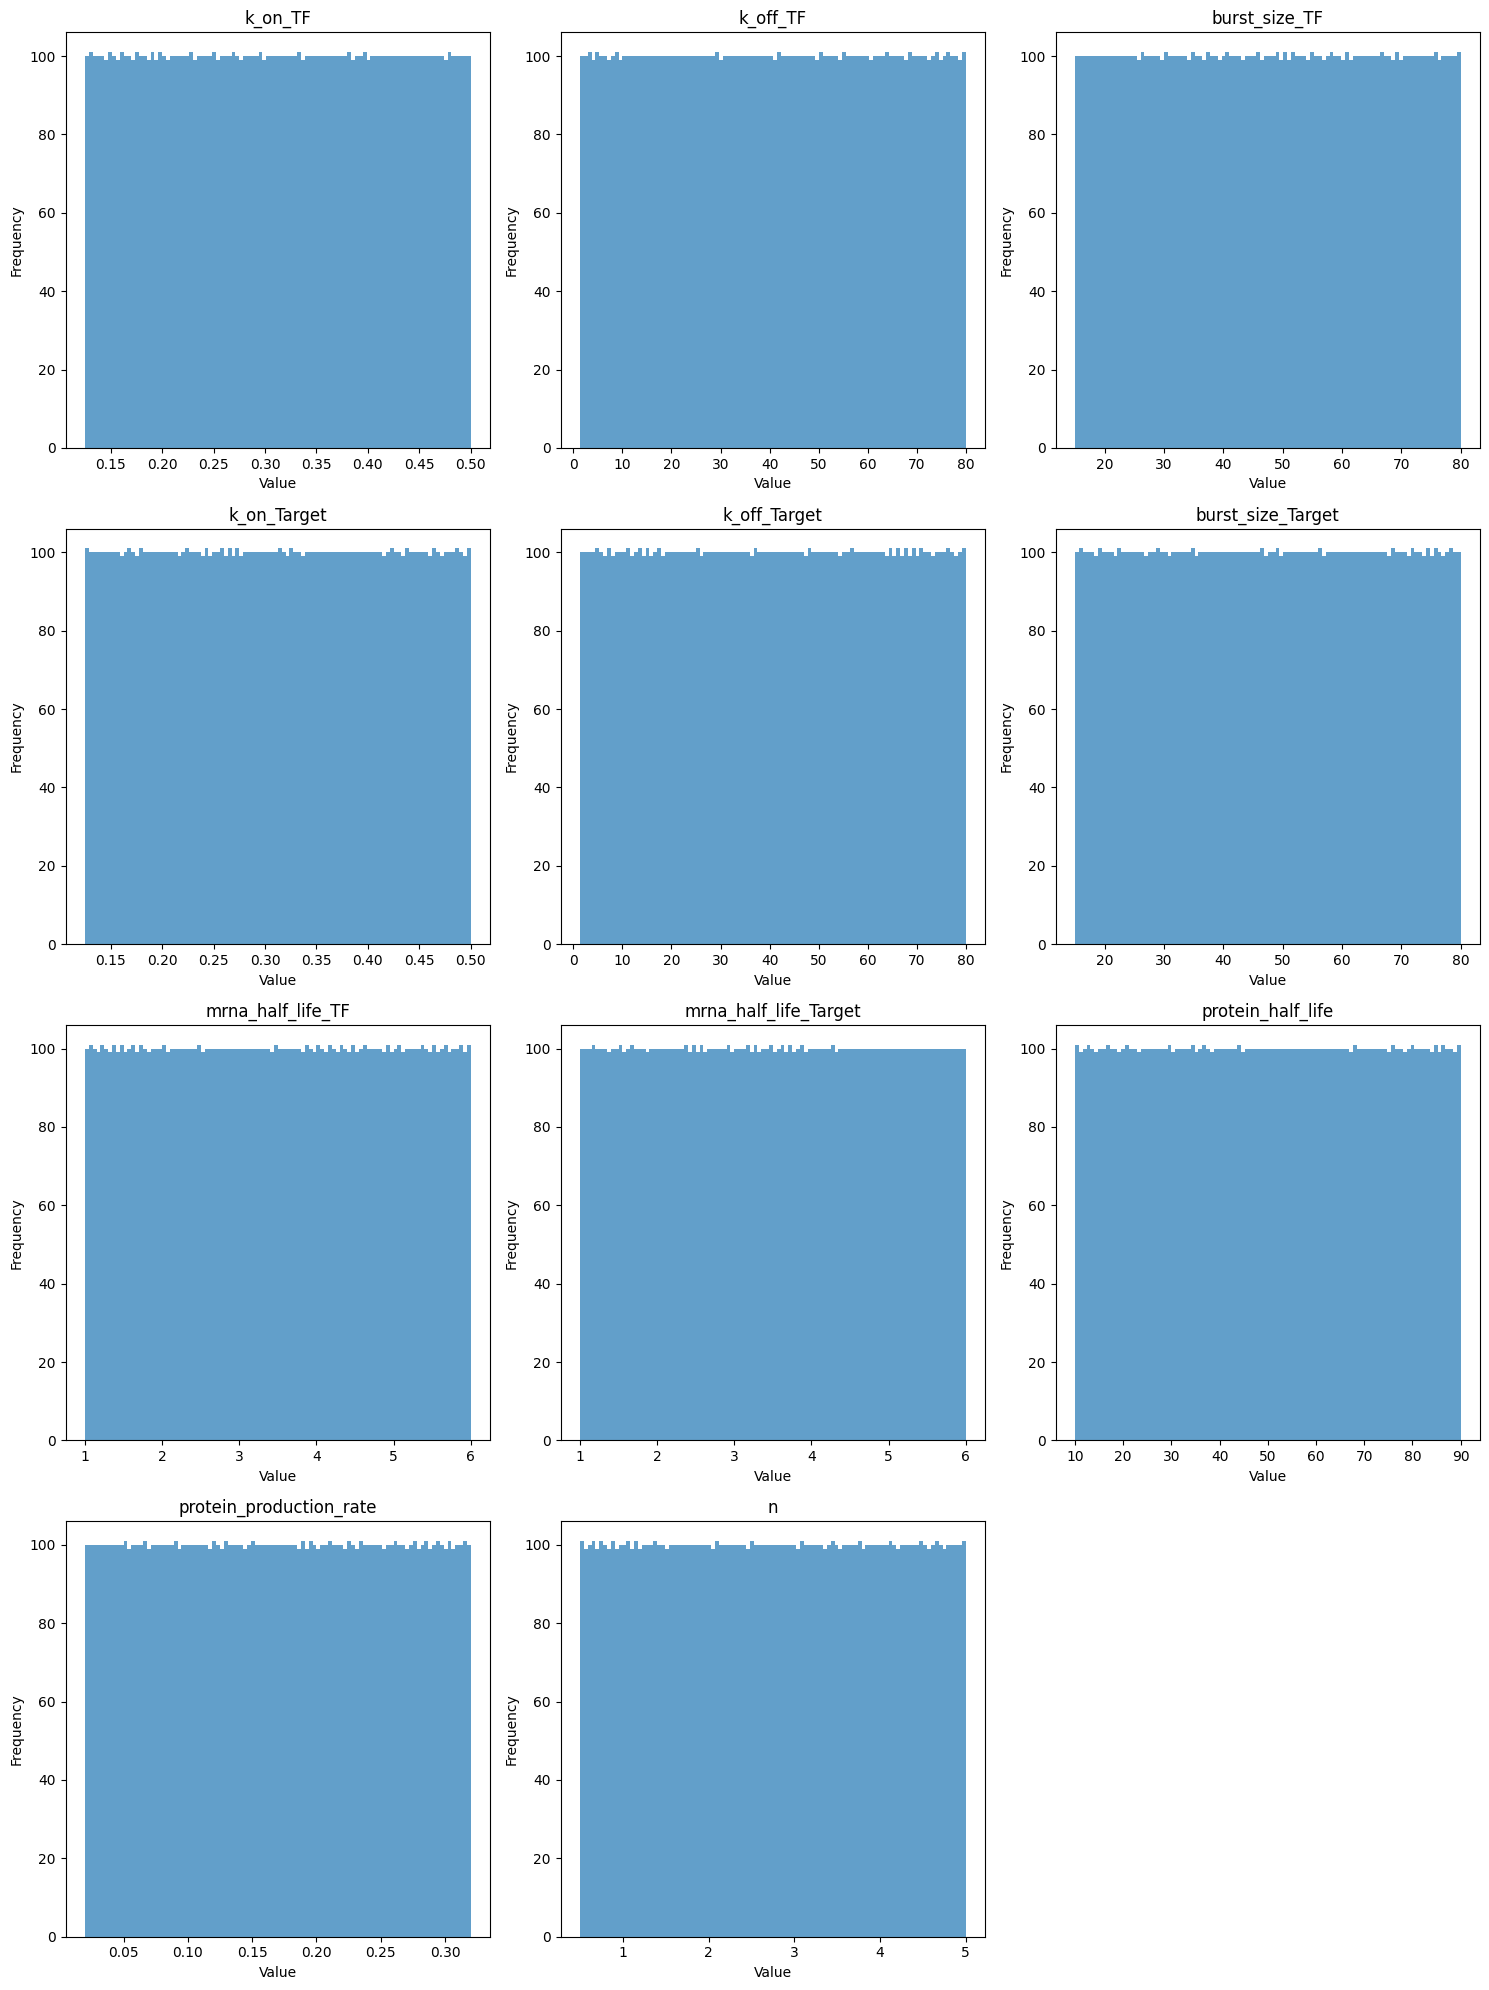

In [8]:
#Plot histogram with binning for each parameter
import matplotlib.pyplot as plt
def plot_parameter_histograms(parameter_samples_df):
    num_params = len(parameter_samples_df.columns)
    fig, axes = plt.subplots(nrows=(num_params + 2) // 3, ncols=3, figsize=(15, 5 * ((num_params + 2) // 3)))
    axes = axes.flatten()
    
    for i, param in enumerate(parameter_samples_df.columns):
        axes[i].hist(parameter_samples_df[param], bins=100, alpha=0.7)
        axes[i].set_title(param)
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()
plot_parameter_histograms(parameter_samples_df)

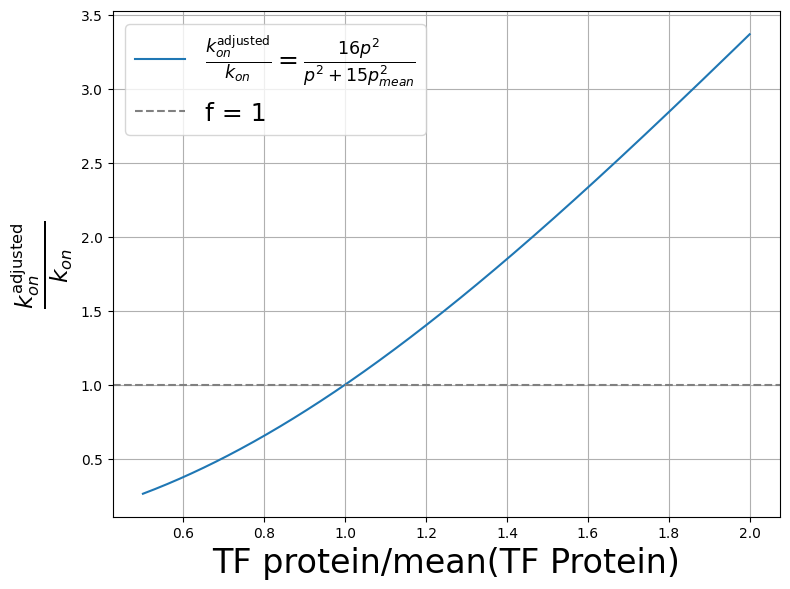

In [37]:
import numpy as np
import matplotlib.pyplot as plt

p_vals = np.linspace(0.5, 2, 500)
f_vals = 16 * p_vals**2 / (p_vals**2 + 15)

plt.figure(figsize=(8, 6))
plt.plot(p_vals, f_vals, label=r'$\frac{k_{on}^{\mathrm{adjusted}}}{k_{on}} = \frac{16p^2}{p^2 + 15p_{mean}^2}$')
plt.axhline(1, color='gray', linestyle='--', label='f = 1')

plt.xlabel('TF protein/mean(TF Protein)', fontsize = 24)
plt.ylabel(r'$\frac{k_{on}^{\mathrm{adjusted}}}{k_{on}}$', fontsize = 24)


plt.legend(fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()


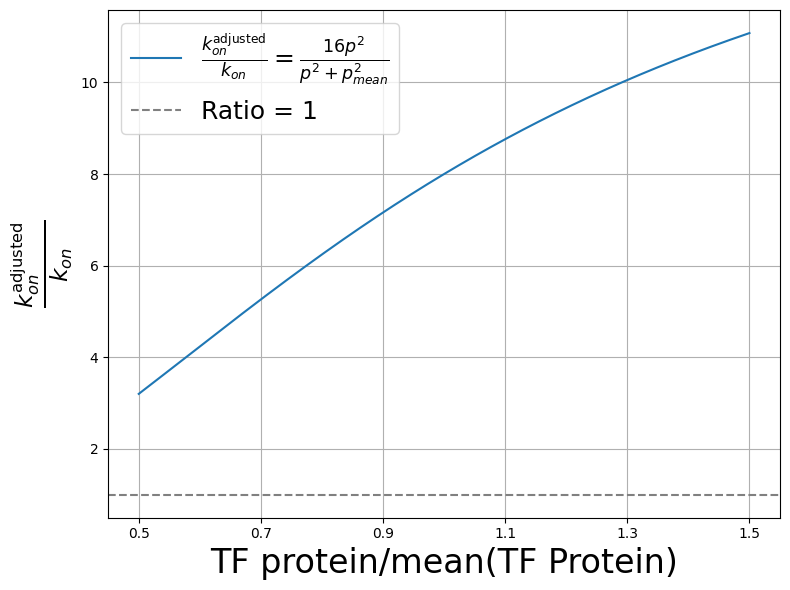

In [46]:
import numpy as np
import matplotlib.pyplot as plt

p_vals = np.linspace(0.5, 1.5, 500)
f_vals = 16 * p_vals**2 / (p_vals**2 + 15)

plt.figure(figsize=(8, 6))
plt.plot(p_vals, f_vals, label=r'$\frac{k_{on}^{\mathrm{adjusted}}}{k_{on}} = \frac{16p^2}{p^2 + 15p_{mean}^2}$')
plt.axhline(1, color='gray', linestyle='--', label='Ratio = 1')

plt.xlabel('TF protein/mean(TF Protein)', fontsize = 24)
plt.ylabel(r'$\frac{k_{on}^{\mathrm{adjusted}}}{k_{on}}$', fontsize = 24)
plt.xticks(np.arange(0.5,1.6, 0.2))

plt.legend(fontsize=18)
plt.grid(True)
plt.tight_layout()
plt.show()
